In [19]:
import random
import numpy as np

In [51]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)
    print('Crop Failure')
    return im


def crop_image(fname):
    image=Image.open(fname)
    image.load()
    new_image = trim(image)
    new_image.save(fname)

In [20]:
def rollout(prob):
    any_flips = False
    for i in range(4):
        myr = random.random()
        if myr > prob:
            continue
        my_flip = int(random.random() * 2)
        if my_flip == 0:
            return False
        any_flips = True
    return any_flips

In [26]:
def monte_carlo(prob, simulations=10_000):
    wins = 0
    for i in range(simulations):
        if rollout(prob):
            wins += 1
    return wins / simulations
        

In [53]:
possible_probs = np.linspace(0,1,100)
wins = [monte_carlo(x) for x in possible_probs]

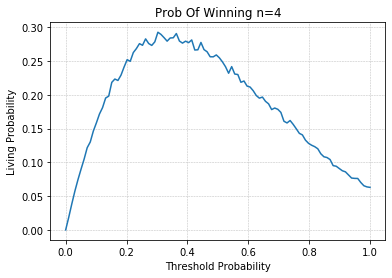

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
_GRID_LINE_PROPERTIES = dict(color='#bdbdbd', linestyle='--', linewidth=0.5)
plt.grid(**_GRID_LINE_PROPERTIES)
plt.plot(possible_probs, wins)
plt.xlabel("Threshold Probability")
plt.ylabel("Living Probability")
plt.title("Prob Of Winning n=4")
plt.savefig('living_4.png')
crop_image('living_4.png')

In [27]:
possible_probs = np.linspace(0.25,0.4,100)
wins = [monte_carlo(x, 100_000) for x in possible_probs]

Text(0, 0.5, 'Living Probability')

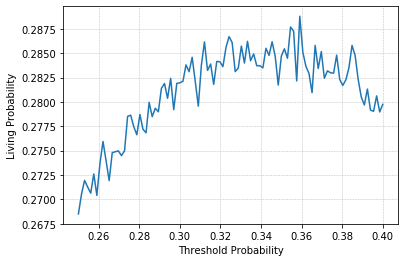

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
_GRID_LINE_PROPERTIES = dict(color='#bdbdbd', linestyle='--', linewidth=0.5)
plt.grid(**_GRID_LINE_PROPERTIES)
plt.plot(possible_probs, wins)
plt.xlabel("Threshold Probability")
plt.ylabel("Living Probability")

In [29]:
possible_probs = np.linspace(0.3,0.4,100)
wins = [monte_carlo(x, 1_000_000) for x in possible_probs]

Text(0, 0.5, 'Living Probability')

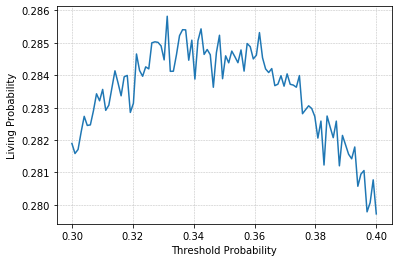

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
_GRID_LINE_PROPERTIES = dict(color='#bdbdbd', linestyle='--', linewidth=0.5)
plt.grid(**_GRID_LINE_PROPERTIES)
plt.plot(possible_probs, wins)
plt.xlabel("Threshold Probability")
plt.ylabel("Living Probability")

In [42]:
import scipy.special
import scipy.optimize

In [38]:
def closed_form(n, threshold):
    total = 0
    for i in range(1, n+1):
        combinations = scipy.special.comb(n, i)
        p_live = 0.5**i
        p_case = (threshold**i)*(1-threshold)**(n-i)
        total += combinations * p_live * p_case
    return total

In [41]:
def my_fn(threshold):
    return -1 * closed_form(4, threshold)

In [45]:
scipy.optimize.minimize(my_fn, 0.2).fun

-0.28484236891948855

In [46]:
living_probs = []
x = []
for i in range(2, 100):
    def my_fn(threshold):
        return -1 * closed_form(i, threshold)
    retval = -1 * scipy.optimize.minimize(my_fn, 0.2).fun
    living_probs.append(retval)
    x.append(i)

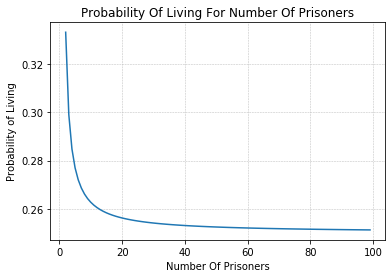

In [56]:
_GRID_LINE_PROPERTIES = dict(color='#bdbdbd', linestyle='--', linewidth=0.5)
plt.grid(**_GRID_LINE_PROPERTIES)
plt.plot(x, living_probs)
plt.xlabel("Number Of Prisoners")
plt.ylabel("Probability of Living")
plt.title("Probability Of Living For Number Of Prisoners")
plt.savefig("live_as_n.png")
crop_image("live_as_n.png")